### Goal

This notebook aims at generating a forecasting model using information from the wildfire data and smoke estimates that we have calculated specific to Madison, WI. The model will estimate smoke for each year, for next 25 years. As we try to build model, we will assess it for the fit and accuracy. This is to ensure our model predictions convey appropriate levels of uncertainty in the prediction.


### Licence

The code in the notebook is licensed under standard [MIT licence](https://github.com/ManasaSRonur/data-512-project/blob/main/LICENSE).

#### Step 1: Data Acquisition

Import all the necessary libraries including statistics and machine leanring librraies.

In [17]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


Load the csv containing the estimate smoke for the past years.

In [18]:
smoke_df = pd.read_csv('intermediary_files/madison_yearly_smoke_estimate_1964_2024.csv')

#### Step 2: Model Build

Polynomial Regression Model is a good choice for predicting smoke estimates over time because it can capture curved non-linear patterns in data that we observed in data earlier, unlike basic linear regression, which only fits straight lines. This flexibility is useful for analyzing long-term data with upward or downward trends that don’t have clear seasonal patterns. Polynomial regression is also easy to set up and understand, so we can see how the trend changes over time. By choosing a reasonable degree, like 3 or 4, we can hope to get accurate results while avoiding overly complex models. On the other hand, models like ARIMA work better with data that has strong repeating patterns or autocorrelation, which we don’t see in our data.

We will fit a Polynomial Regression model with degree 3. The below code creates a third-degree polynomial transformation of the `Fire_Year` feature to capture more complex patterns in smoke estimates over time. It then trains a linear regression model using these transformed features, allowing the model to fit a curved trend in the data. 

In [19]:
# Create polynomial features
X = smoke_df[['Fire_Year']]
y = smoke_df['Smoke_Estimate']
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)
print("Fitted a Polynomial Regression model with degree 3")

Fitted a Polynomial Regression model with degree 3


We will use the model to make predictions on the historical smoke estimate data to check how accurate the model is. It creates a scatter plot showing the actual smoke estimates over the years and adds a red line to show the predictions from the polynomial regression model. We will plot and visualize the data points and the fitted model.

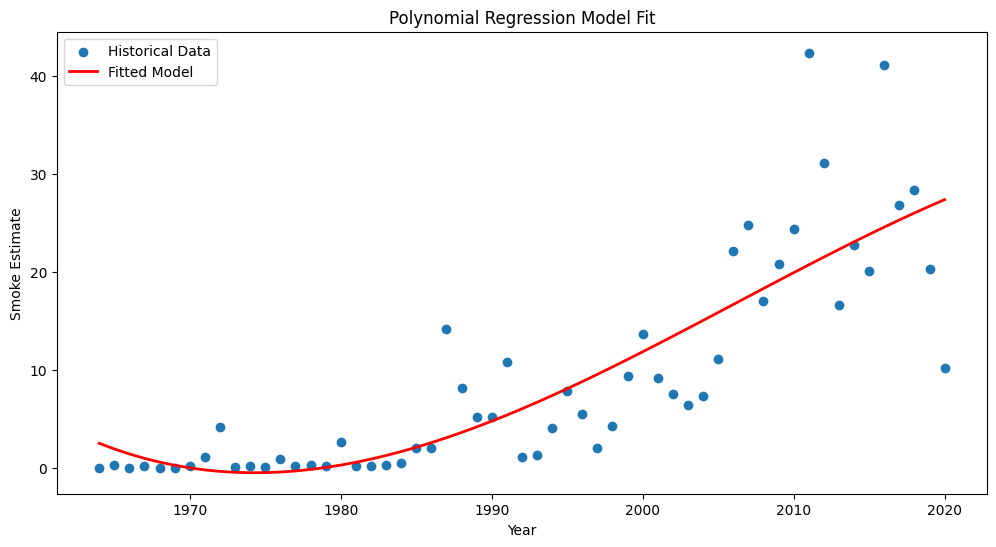

In [20]:
# Make predictions on historical data for accuracy calculation
y_pred = model.predict(X_poly)

# Optionally, visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(smoke_df['Fire_Year'], smoke_df['Smoke_Estimate'], label='Historical Data')
plt.plot(smoke_df['Fire_Year'], y_pred, color='red', label='Fitted Model', linewidth=2)
plt.title('Polynomial Regression Model Fit')
plt.xlabel('Year')
plt.ylabel('Smoke Estimate')
plt.legend()
plt.show()


Next step is to check few metrics to check how accurate our model is and if it can provide reliable predictions. We will compute the below.
- Mean Absolute Error (MAE): This measures the average difference between the actual and predicted smoke estimates, showing how far off the predictions are on average. 

- Mean Squared Error (MSE): This metric calculates the average of the squared differences between actual and predicted values, giving more weight to larger errors if any.

- Root Mean Squared Error (RMSE): This is the square root of MSE, providing a measure of error in the same units as the original data helping us to assess model metrics on familiar scale.

- R-squared (R²): This value indicates how well the model explains the variability of the data, with values closer to 1 suggesting a better fit. Evaluating R² helps us determine the model's effectiveness in capturing relationships and trends in the data.

#### Step 3: Model Validation

In [21]:
# Calculate model accuracy metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y, y_pred)


print("Model Accuracy Metrics")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r_squared:.4f}")

Model Accuracy Metrics
Mean Absolute Error (MAE): 3.7751
Mean Squared Error (MSE): 33.6473
Root Mean Squared Error (RMSE): 5.8006
R-squared (R²): 0.7107


Let us analyse what these numbers mean to us.

- MAE = 3.7751, which shows the average difference between the actual smoke estimates and the model's predictions.

- MSE = 33.6473, indicating the average of the squared differences, with larger errors given more weight. Since MSE is higher than MAE, it suggests that some predictions are significantly off.

- RMSE = 5.8006, which is the square root of the MSE and gives us a measure of error in the same units as the original data. Again this value is higher than the MAE, which implies that while most predictions are fairly close to the actual values, there are notable outliers.

- R² = 0.7107, meaning the model explains only about 71% of the variation in the data, suggesting that there are other factors influencing smoke estimates that the model does not account for.

#### Step 4: Forecast

We are supposed to forecast the smoke estimate for next 25 years i.e. from 2025 - 2050. However we do not have smoke estimate data beyond 2020, so we will estimate from 2021 to 2050. we will visualise the forecasted value to see the overall trend for next 25 years.

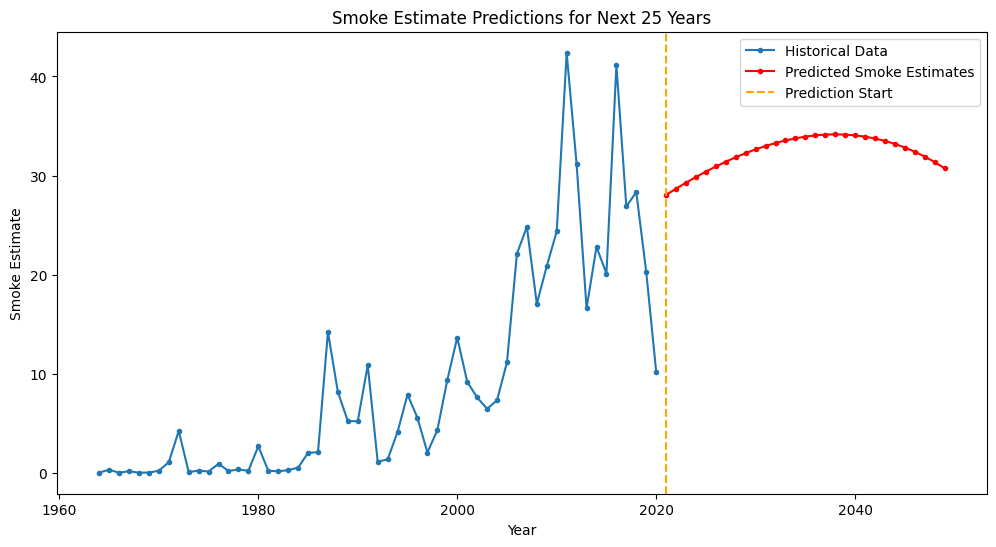

In [22]:
# Predict for the next 30 years (2021 to 2050)
future_years = np.arange(2021, 2050).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
predictions = model.predict(future_years_poly)

years_combined = np.concatenate([X, future_years])
smoke_combined = np.concatenate([y.values, predictions])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(smoke_df['Fire_Year'], smoke_df['Smoke_Estimate'], label='Historical Data', linewidth=1.5, marker = '.')
plt.plot(future_years, predictions, color='red', label='Predicted Smoke Estimates', linewidth=1.5, marker = '.')
plt.title('Smoke Estimate Predictions for Next 25 Years')
plt.xlabel('Year')
plt.ylabel('Smoke Estimate')
plt.axvline(x=2021, color='orange', linestyle='--', label='Prediction Start')
plt.legend()
plt.show()

From the metrics we know the model explains about 71% of the variation in the data, there is still a lot of room for improvement in the model. Additionally the predicted values could be off by atleast 2 units which is significantly high for our scale of smoke estimates. While this is a fairly good model considering the data availability limitaion, this is not the best model to forecast the smoke estimate. We will have to further improve the model probably by trying some of the these options:
- Add new relevant features like weather conditions and vegetation type, and transform existing features to better capture the relationships.

- Check for and remove outliers (result of effects outside our study scope) that may affect the results.

- Source accurate and high-quality, that helps the model learn better patterns, leading to more accurate and trustworthy predictions.